Install Packages

In [ ]:
! pip install geopandas
! pip install pandas

Read .shp file

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Path to shape file
SHAPE_PATH = "lct_000b21a_e/lct_000b21a_e.shp"
gdf = gpd.read_file(SHAPE_PATH)

toronto_gdf = gdf[gdf['CTUID'].str.startswith('535000')]

# toronto_gdf['centroid'] = toronto_gdf.geometry.centroid
# central_toronto_gdf = toronto_gdf[toronto_gdf['CTUID'].between('5350001', '5350005')]
central_toronto_gdf = toronto_gdf[toronto_gdf['CTUID'].between('5350001', '5350379')]
# centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], geometry=central_toronto_gdf['centroid'])

# toronto_df = pd.DataFrame(toronto_gdf)



In [2]:
# toronto_gdf
central_toronto_gdf['CTUID'] = central_toronto_gdf['CTUID'].astype(str)
central_toronto_gdf

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry
904,5350001.00,2021S05075350001.00,0001.00,6.8192,35,"MULTIPOLYGON (((7228907.129 925600.146, 722890..."
905,5350002.00,2021S05075350002.00,0002.00,3.3926,35,"MULTIPOLYGON (((7225485.523 924880.603, 722548..."
906,5350003.00,2021S05075350003.00,0003.00,0.9455,35,"MULTIPOLYGON (((7220414.503 925572.426, 722041..."
907,5350004.00,2021S05075350004.00,0004.00,0.3404,35,"POLYGON ((7220890.583 926060.209, 7220963.994 ..."
908,5350005.00,2021S05075350005.00,0005.00,0.3764,35,"POLYGON ((7221811.977 926672.983, 7221851.546 ..."
909,5350006.00,2021S05075350006.00,0006.00,0.0129,35,"POLYGON ((7221220.271 925930.963, 7221100.76 9..."
911,5350009.00,2021S05075350009.00,0009.00,0.1032,35,"POLYGON ((7222432.583 927008.057, 7221999.823 ..."
3109,5350008.01,2021S05075350008.01,0008.01,0.3092,35,"POLYGON ((7222301.269 926203.191, 7222257.906 ..."
3131,5350008.02,2021S05075350008.02,0008.02,1.9151,35,"MULTIPOLYGON (((7223567.283 925947.14, 7223566..."
3531,5350007.01,2021S05075350007.01,0007.01,0.1999,35,"POLYGON ((7221390.82 926046.714, 7221415.046 9..."


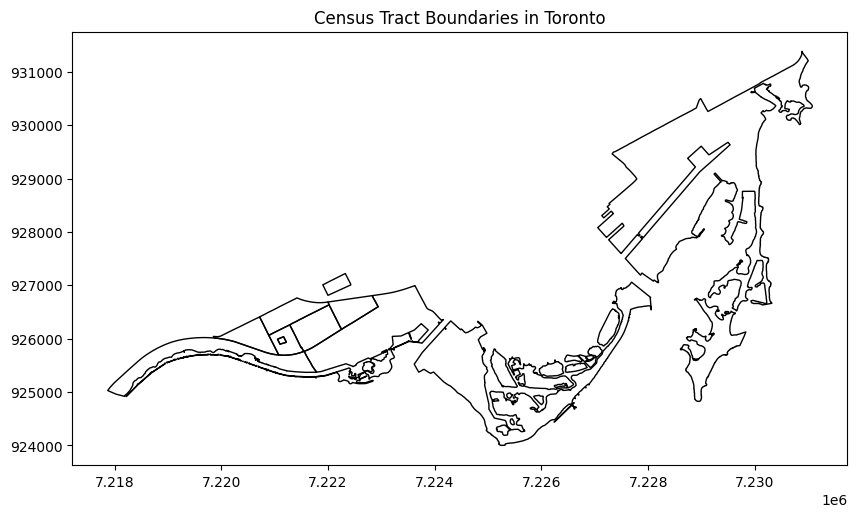

In [71]:
# # Ensure geometries are valid
# gdf = gdf[gdf.is_valid]

# Plot the data
central_toronto_gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
plt.title("Census Tract Boundaries in Toronto")
plt.show()

# fig, ax = plt.subplots(figsize=(10, 10))
# central_toronto_gdf.plot(ax=ax)
# gdf.plot(ax=ax, color='red', marker='o', markersize=5, label='Centroids')
# plt.xlim(-180, -60)
# plt.ylim(10, 80)
# plt.title('toronto')
# plt.xlabel('x-coordinate')
# plt.ylabel('y-coordinate')
# plt.show()

In [ ]:
# Save to csv
# df = pd.DataFrame(gdf)
n_centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], central_toronto_gdf[['DGUID']], central_toronto_gdf[['CTNAME']],
                                 central_toronto_gdf[['LANDAREA']], central_toronto_gdf[['PRUID']], geometry=central_toronto_gdf['centroid'])

OUTPUT_PATH = "/toronto_ct_centroids.geojson"
n_centroids_gdf.to_json(OUTPUT_PATH)

TypeError: DataFrame.__init__() got multiple values for argument 'copy'

In [ ]:
central_toronto_gdf = central_toronto_gdf.to_crs('EPSG:4326')
n_centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], central_toronto_gdf[['DGUID']], central_toronto_gdf[['CTNAME']],
                                 central_toronto_gdf[['LANDAREA']], central_toronto_gdf[['PRUID']], geometry=central_toronto_gdf['centroid'])

OUTPUT_PATH = "/toronto_ct_centroids.geojson"
n_centroids_gdf.to_json(OUTPUT_PATH)

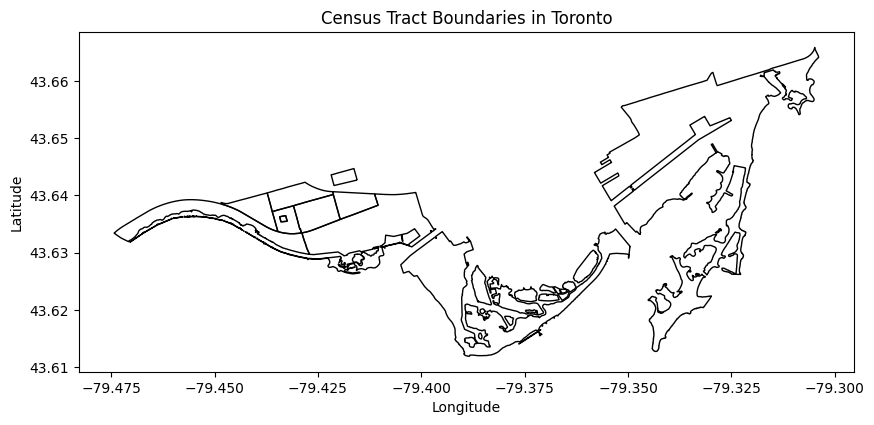

In [ ]:
import folium
central_toronto_gdf = central_toronto_gdf.to_crs('EPSG:4326')
central_toronto_gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
plt.title("Census Tract Boundaries in Toronto")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

OUTPUT_PATH = "toronto_ct_boundaries.geojson"
central_toronto_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')


# Create a map centered around Toronto
m = folium.Map(location=[43.65107, -79.347015], zoom_start=12)

# Add the GeoDataFrame to the map
folium.GeoJson(central_toronto_gdf).add_to(m)

# Save the map to an HTML file
m.save("toronto_map.html")

# Display the map
m

In [63]:
OUTPUT_PATH = "toronto_ct_boundaries_4_shapes_4326.json"
central_toronto_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')


In [ ]:
# Read the CSV file
hospital_gdf = pd.read_csv("/Users/max/Desktop/Transit_Dashboard/data/census/gdf_filtered_hospital.csv")

# Convert the CTUID column to string with two decimal places
hospital_gdf['CTUID'] = hospital_gdf['CTUID'].apply(lambda x: f"{x:.2f}")

# Display the dataframe
hospital_gdf.head()
# Save the dataframe to a new CSV file
hospital_gdf.to_csv("/Users/max/Desktop/Transit_Dashboard/data/census/gdf_filtered_hospital_updated.csv", index=False)

In [73]:
print(1)

1


In [74]:
# Read the CSV file
hospital_gdf = pd.read_csv("/Users/max/Desktop/Transit_Dashboard/data/census/gdf_filtered_hospital.csv")

# Convert the CTUID column to string with two decimal places
hospital_gdf['CTUID'] = hospital_gdf['CTUID'].apply(lambda x: f"{x:.2f}")

# Display the dataframe
hospital_gdf.head()
# Save the dataframe to a new CSV file
hospital_gdf.to_csv("/Users/max/Desktop/Transit_Dashboard/data/census/gdf_filtered_hospital_updated.csv", index=False)